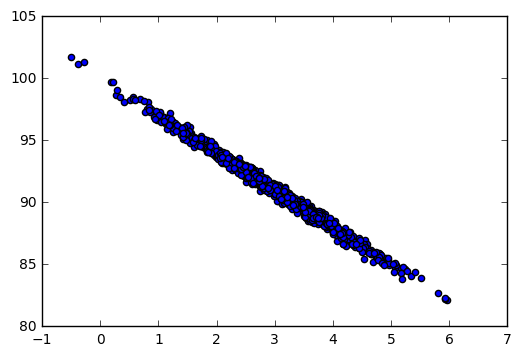

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

pageSpeeds=np.random.normal(3.0,1.0,1000)
purchaseAmount=100-(pageSpeeds+np.random.normal(0,0.1,1000))*3

scatter(pageSpeeds,purchaseAmount)

In [4]:
from scipy import stats
slope, intercept, r_value,p_value,std_err=stats.linregress(pageSpeeds,purchaseAmount)

r_value**2

0.9899081353863125

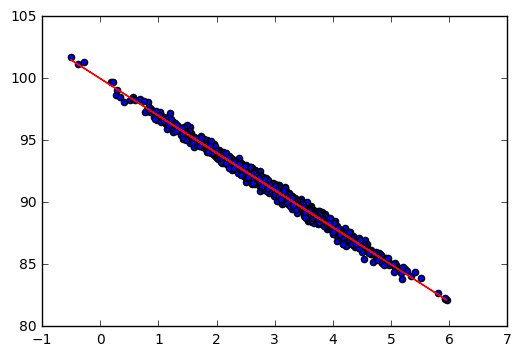

In [6]:
def predict(x):
    return slope*x+intercept

fitLine=predict(pageSpeeds)

plt.scatter(pageSpeeds,purchaseAmount)
plt.plot(pageSpeeds,fitLine,c='r')
plt.show()

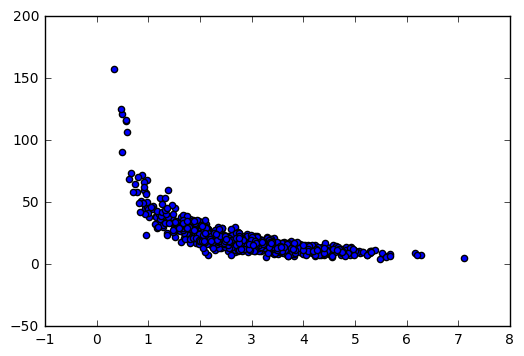

In [9]:
np.random.seed(2)
pageSpeeds=np.random.normal(3.0,1.0,1000)
purchaseAmount=np.random.normal(50.0,10.0,1000)/pageSpeeds

plt.scatter(pageSpeeds,purchaseAmount)

In [36]:
x=np.array(pageSpeeds)
y=np.array(purchaseAmount)
p4=np.poly1d(np.polyfit(x,y,4))

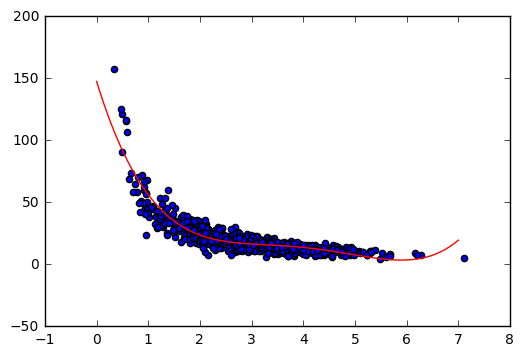

In [37]:
xp=np.linspace(0,7,100)
plt.scatter(x,y)
plt.plot(xp,p4(xp),c='r')
plt.show()

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))

print (r2)

0.82937663963


In [42]:
import pandas as pd
df=pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [43]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [50]:
import statsmodels.api as sm
df['Model_ord']=pd.Categorical(df.Model).codes

X=df[['Mileage','Model_ord','Doors']]
y=df[['Price']]

X1=sm.add_constant(X)
est=sm.OLS(y,X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Wed, 12 Apr 2017   Prob (F-statistic):           1.98e-07
Time:                        17:47:39   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000      2.77e+04  3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000        -0.259    -0.095
Model_ord    -39.0387     39.326     -0.993      0.321      -116.234    38.157
Doors      -1652.9303    402.649     -4.105      0.000     -2443.303  -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""